In [49]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

n_ancilla = 3 #number of ancilla qubits. since it is 3 the precision is 1/8
omega = np.pi/4
#backend = Aer.get_backend('aer_simulator')
backend = AerSimulator()

#building the quantum circuit
qc = QuantumCircuit(n_ancilla+1, n_ancilla)

qc.x(n_ancilla) #applying pauli x

qc.h(range(n_ancilla)) #applyin Handarmard gate


for j in range(n_ancilla): #apply controlled -U^{2^j} operations
    qc.cp(2* omega * 2**j, j , n_ancilla)

    
qc.draw("text")


┌───┐                        
q_0: ┤ H ├─■──────────────────────
     ├───┤ │                      
q_1: ┤ H ├─┼────────■─────────────
     ├───┤ │        │             
q_2: ┤ H ├─┼────────┼──────■──────
     ├───┤ │P(π/2)  │P(π)  │P(2π) 
q_3: ┤ X ├─■────────■──────■──────
     └───┘                        
c: 3/═════════════════════════════

In [50]:
#Applying inverse QFT on the ancilla bit

def inverse_qft(qc, n):
    for qubit in range(n//2):
        qc.swap=(qubit, n-qubit-1)
    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi/(2**(j-k)), k , j)
        qc.h(j)
    return qc

qc.barrier()
qc = inverse_qft(qc, n_ancilla)

qc.draw("text")

┌───┐                         ░ ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────░─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       ░ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────░───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              ░                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────░──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)  ░                                         »
q_3: ┤ X ├─■────────■──────■───────░─────────────────────────────────────────»
     └───┘                         ░                                         »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«          
«q_0: ─────
«          
«q_1: ─────
«     ┌───┐
«q_2: ┤ H ├
«     └───┘
«q_3: ─────
«          
«c: 3/═════
«

In [41]:
from qiskit.circuit.library import QFT

#building the quantum circuit
qc = QuantumCircuit(n_ancilla+1, n_ancilla)

qc.x(n_ancilla) #applying pauli x

qc.h(range(n_ancilla)) #applyin Handarmard gate


for j in range(n_ancilla): #apply controlled -U^{2^j} operations
    qc.cp(2* omega * 2**j, j , n_ancilla)

#Applying inverse Forier Transform   
qft_dagger = QFT(num_qubits = n_ancilla, inverse=True, do_swaps=True).to_instruction()
qc.append(qft_dagger, range(n_ancilla))





C:\Users\Isitha\AppData\Local\Temp\ipykernel_31380\1414728439.py:15: DeprecationWarning: The class ``qiskit.circuit.library.basis_change.qft.QFT`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. ('Use qiskit.circuit.library.QFTGate or qiskit.synthesis.qft.synth_qft_full instead, for access to all previous arguments.',)
  qft_dagger = QFT(num_qubits = n_ancilla, inverse=True, do_swaps=True).to_instruction()


┌───┐                        ┌───────┐
q_0: ┤ H ├─■──────────────────────┤0      ├
     ├───┤ │                      │       │
q_1: ┤ H ├─┼────────■─────────────┤1 IQFT ├
     ├───┤ │        │             │       │
q_2: ┤ H ├─┼────────┼──────■──────┤2      ├
     ├───┤ │P(π/2)  │P(π)  │P(2π) └───────┘
q_3: ┤ X ├─■────────■──────■───────────────
     └───┘                                 
c: 3/══════════════════════════════════════

In [51]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram


#Measure the ancilla
qc.measure(range(n_ancilla), range(n_ancilla))

qc.draw("text")

┌───┐                         ░ ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────░─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       ░ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────░───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              ░                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────░──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)  ░                                         »
q_3: ┤ X ├─■────────■──────■───────░─────────────────────────────────────────»
     └───┘                         ░                                         »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐           
«q_0: ┤M├───────────
«     └╥┘     ┌─┐   
«q_1: ─╫──────┤M├───
«      ║ ┌───┐└╥┘┌─┐
«q_2: ─╫─┤ H ├─╫─┤M├
«      ║ └───┘ ║ └╥┘
«q_3: ─╫───────╫──╫─
«      ║       ║  ║ 
«c: 3/═╩═══════╩══╩═
«      0       1  2

QPE measurement counts: 
{'111': 217, '010': 273, '110': 248, '001': 227, '101': 31, '011': 28}


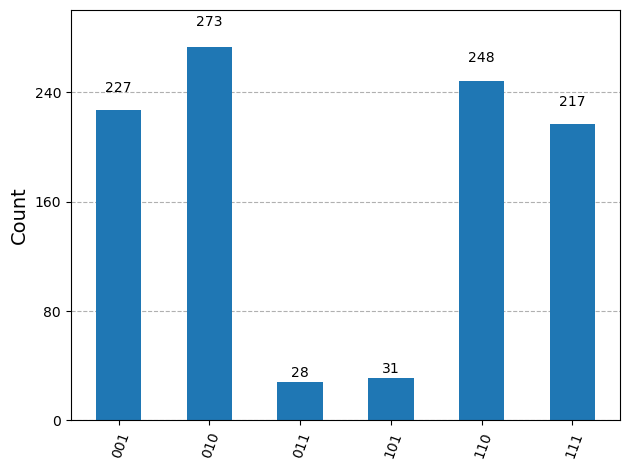

In [55]:
tqc = transpile(qc, backend)

job = backend.run([tqc], shots =1024)
result = job.result()
counts = result.get_counts(0)



print("QPE measurement counts: ")
print(counts)


plot_histogram(counts)

1.	Initial State
	•	All qubits start in the zero state: |000⟩ |0⟩.
	•	The ancilla register is ready to store phase information, and the system qubit will hold the eigenstate.

2.	Preparing the System Qubit
	•	Apply an X gate to the system qubit to prepare |1⟩.
	•	This ensures the system qubit is an eigenstate of the phase unitary, which is required for correct phase encoding.

3.	Hadamard on Ancilla Qubits
	•	Each ancilla qubit goes into a superposition: |0⟩ → (|0⟩ + |1⟩)/√2.
	•	The ancilla register now represents all binary numbers 0–7 simultaneously, enabling quantum parallelism.

4.	Controlled-U Operations (Phase Encoding)
	•	Each ancilla qubit controls a phase rotation proportional to 2^j * φ.
	•	The state becomes a phase ramp over all ancilla bitstrings, e.g.,

|000⟩ → 1
|001⟩ → e^{iπ/4}
|010⟩ → e^{iπ/2}, ...

This encodes the frequency information into the amplitudes of the ancilla register.

5.	Before IQFT (Bits Not Readable)
	•	At this point, the ancilla qubits store the phase in the Fourier basis, not in classical bits.
	•	Measurement now would give essentially random results.

6.	Swap Qubits for Bit Ordering
	•	SWAP gates reorder qubits so the most significant bit corresponds correctly after IQFT.
	•	The amplitudes remain the same; only the bit significance is corrected.

7.	Inverse QFT (IQFT) — Bit Extraction
	•	IQFT transforms the phase-encoded amplitudes into computational basis states.
	•	Bits are extracted from most significant to least significant, aligning probabilities so that the correct binary approximation of the phase becomes most likely.

8.	After IQFT
	•	For our example (φ = 1/8), the ancilla register collapses to |001⟩.
	•	The binary pattern directly represents the phase with precision 1/8.

9.	Measurement
	•	Only the ancilla qubits are measured.
	•	The measurement yields the bitstring 001, which is the binary approximation of the phase.

10.	Binary → Decimal Phase Conversion
	•	Convert 001 → 1 → φ = 1/8.
	•	Multiply by 2π to recover the frequency: ω = π/4.
	•	This matches the original phase exactly.

11.	DSP Interpretation
	•	Hadamard gates → excite all frequency components
	•	Controlled-U → encode phase/frequency
	•	IQFT → inverse Fourier transform to read out frequency
	•	Measurement → digital frequency bin

12.	Takeaway
	•	QPE naturally produces a sinc-like spectral response, acting as a frequency-selective filter.
	•	This bit-level understanding is foundational for Quantum Signal Processing (QSP) and polynomial filter design in quantum circuits.